# Plot training and validation results for Touch Chart Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import object_reconstruction.data.checkpoints as checkpoints
import os

In [2]:
name_run = '15_09_1137'
file_path = os.path.join(os.path.dirname(checkpoints.__file__), 'touch_model', name_run, 'results_dict.npy')
results_dict = np.load(file_path, allow_pickle=True).item()

Extract **training** and **validation** values:

In [8]:
size = len(results_dict[0]['train'])
train_array = np.array([]).reshape(0, size)
val_array = np.array([]).reshape(0, size)

for fold in results_dict.keys():
    train_array = np.vstack((train_array, results_dict[fold]['train']))
    val_array = np.vstack((val_array, results_dict[fold]['val']))

Extract average values and sdtandard deviation:

In [9]:
train_mean = np.mean(train_array, 0)
train_std = np.std(train_array, 0)
val_mean = np.mean(val_array, 0)
val_std = np.std(val_array, 0)

Plot:

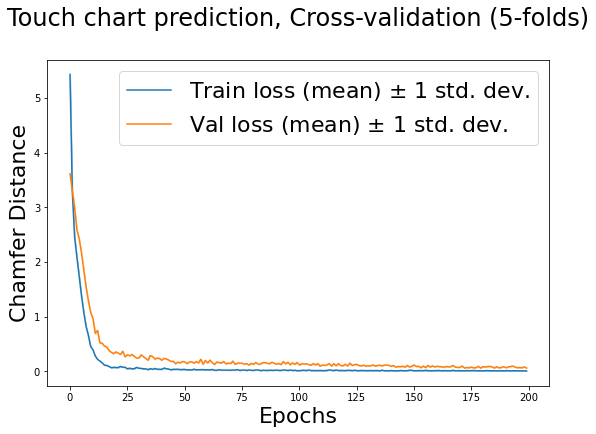

In [10]:
plt.figure(figsize=(9, 6))
plt.title('Touch chart prediction, Cross-validation (5-folds)\n', fontsize=24)
plt.plot(train_mean, label='Train loss (mean) $\pm$ 1 std. dev.')
plt.fill_between(np.arange(0, len(train_mean)), train_mean-train_std, train_mean+train_std, color='lightblue')
plt.plot(val_mean, label='Val loss (mean) $\pm$ 1 std. dev.')
plt.fill_between(np.arange(0, len(val_mean)), val_mean-val_std, val_mean+val_std, color='wheat')
plt.xlabel('Epochs', fontsize=22)
plt.ylabel('Chamfer Distance', fontsize=22) 
plt.legend(fontsize=22)
plt.show()